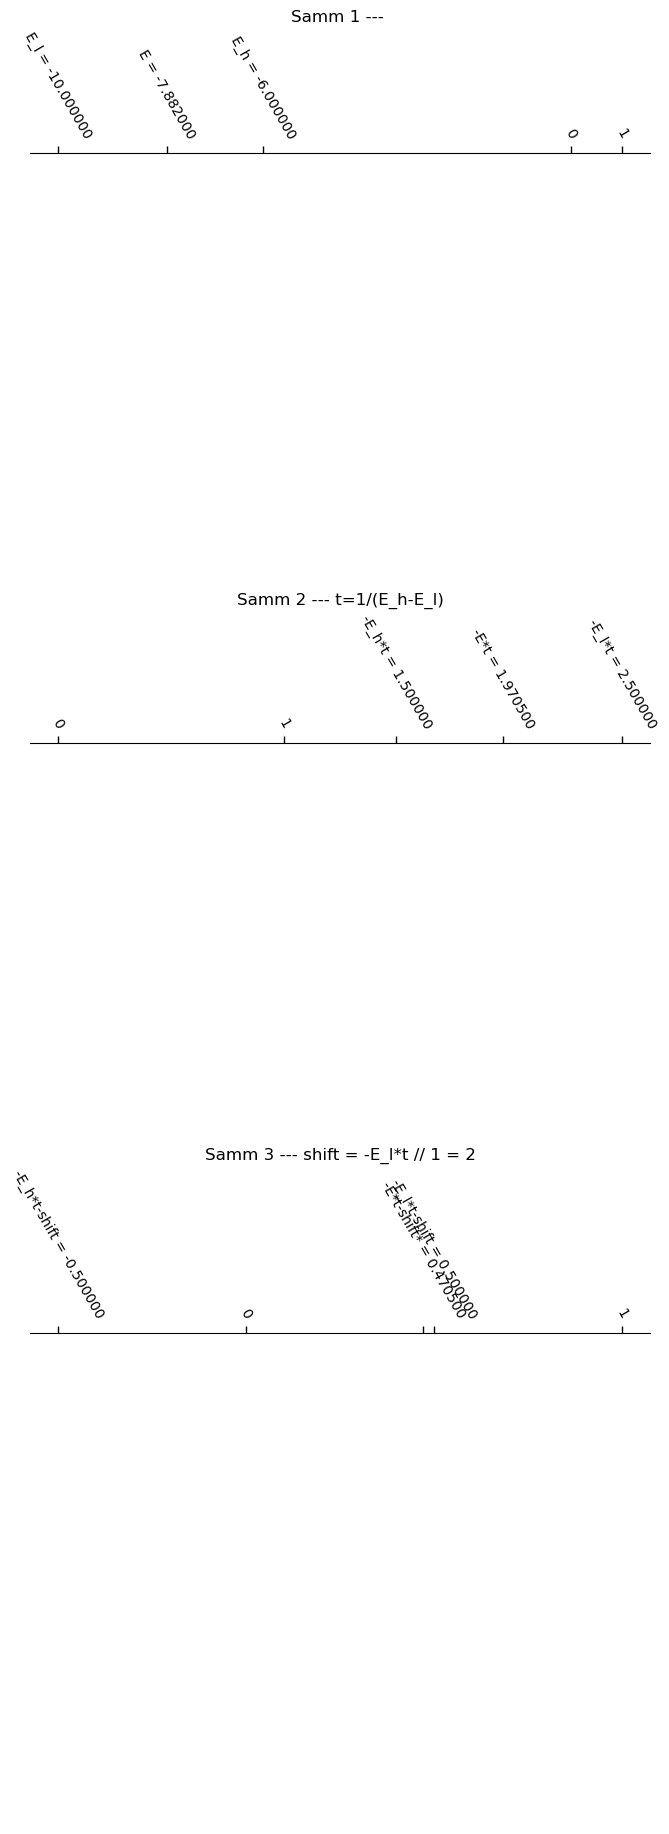

In [113]:
from matplotlib import pyplot
from matplotlib import ticker

n = 8

def show(i, x, a, b, descr):
    def fmt_fn(tick_val, tick_pos):
        if tick_val == x[1]:
            return "%s = %f" % x
        if tick_val == a[1]:
            if tick_val == b[1]:
                return "%s = %s = %f" % (a[0], b[0], b[1])
            return "%s = %f" % a
        if tick_val == b[1]:
            return "%s = %f" % b
        if tick_val == 0:
            return 0
        if tick_val == 1:
            return 1
    ax = pyplot.subplot(n, 1, i)
    ticks = list(sorted([0, 1, x[1], a[1], b[1]]))
    max_tick = max(ticks)
    min_tick = min(ticks)
    amp_ticks = max_tick - min_tick
    ylim_low = min_tick - amp_ticks * 0.05
    ylim_high = max_tick + amp_ticks * 0.05
    ax.set_title("Samm %d --- %s" % (i, descr))
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines["bottom"].set_color('none')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(which='major', width=1.00, rotation=-60)
    ax.tick_params(which='major', length=5)
    ax.set_xlim(ylim_low, ylim_high)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)
    ax.xaxis.set_major_locator(ticker.FixedLocator(ticks))
    ax.xaxis.set_major_formatter(fmt_fn)

pyplot.figure(figsize=(8, 60))

# pyplot.subplots_adjust(wspace=3)

E = -7.882
E_l, E_h = -10, -6
show(1, ("E", E), ("E_l", E_l), ("E_h", E_h), "")

t = 1 / (E_h - E_l)
u = -E * t
u_h = -E_h * t
u_l = -E_l * t
show(2, ("-E*t", u), ("-E_h*t", u_h), ("-E_l*t", u_l), "t=1/(E_h-E_l)")

shift = u_l // 1
v_h = u_h - shift
v_l = u_l - shift
v = v_h + (u - u_h)
show(3, ("-E*t-shift", v), ("-E_h*t-shift", v_h), ("-E_l*t-shift", v_l), "shift = -E_l*t // 1 = %d" % shift)


w = v if v > 0 else v + v_l 
show(3, ("-E*t-shift*", w), ("-E_h*t-shift", v_h), ("-E_l*t-shift", v_l), "shift = -E_l*t // 1 = %d" % shift)

In [ ]:
E_